In [ ]:
with open(str("/content/drive/MyDrive/MIE 1666 Project/experiment_2_grid/22433__trans__seed__1__sample__0.yml")) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print('New SCIP branch grid')
    print(data['gap'],data['solve_time'])
with open(str("/content/drive/MyDrive/MIE 1666 Project/experiment_table21_s_e_e_d_2/22433__trans__seed__1__sample__0.yml")) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print('OLD SCIP grid')
    print(data['gap'],data['solve_time'])
with open(str("/content/drive/MyDrive/MIE 1666 Project/experiment_2_default/22433__trans__seed__1__sample__0.yml")) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print('New SCIP branch default')
    print(data['gap'],data['solve_time'])
with open(str("/content/drive/MyDrive/MIE 1666 Project/experiment_default_2_s_e_e_d_s/22433__trans__seed__1__sample__0.yml")) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print('OLD SCIP default')
    print(data['gap'],data['solve_time'])


New SCIP branch grid
0.0 1.365044
OLD SCIP grid
0.0 1.389535
New SCIP branch default
0.0 1.214273
OLD SCIP default
0.0 1.205509


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pyyaml module
import yaml
from yaml.loader import SafeLoader
'''
path_ = "/content/drive/MyDrive/MIE 1666 Project/run_3_seeds/experiment_default"
default_yml_paths = list(Path(path_).rglob("*.yml" ))
path_ = "/content/drive/MyDrive/MIE 1666 Project/new_temp_grid"
grid_search_yml_paths = list(Path(path_).rglob("*.yml" ))'''


path_ = "/content/drive/MyDrive/MIE 1666 Project/experiment_set_cover"
syn_set_covering_yml_paths = list(Path(path_).rglob("*.yml" ))

In [ ]:
print(len(default_yml_paths))
print(len(grid_search_yml_paths))

594
6


# Averaging over all grid search seeds

In [ ]:
rows

{'22433': [[0.0, 1.390096, 'optimal'],
  [0.0, 1.228322, 'optimal'],
  [0.0, 1.168758, 'optimal']],
 '23588': [[0.0, 3.995627, 'optimal'],
  [0.0, 4.984735, 'optimal'],
  [0.0, 3.910366, 'optimal']],
 '50v-10': [[0.025232428830875852, 600.000924, 'timelimit'],
  [0.020304928764733405, 600.000623, 'timelimit'],
  [0.0194470009252873, 600.000684, 'timelimit']],
 'a2c1s1': [[0.05262548847823161, 600.000112, 'timelimit'],
  [0.04771323810067682, 600.000217, 'timelimit'],
  [0.040828993356272034, 600.000238, 'timelimit']],
 'app1-1': [[0.0, 3.236901, 'optimal'],
  [0.0, 1.615583, 'optimal'],
  [0.0, 3.446779, 'optimal']],
 'app3': [[0.0, 1.882994, 'optimal'],
  [0.0, 2.662115, 'optimal'],
  [0.0, 1.907226, 'optimal']],
 'b1c1s1': [[0.17988965399792448, 600.000694, 'timelimit'],
  [0.19664440258986632, 600.000358, 'timelimit'],
  [0.20051344152652398, 600.001037, 'timelimit']],
 'b2c1s1': [[0.24146789686590006, 600.000126, 'timelimit'],
  [0.35298980513266665, 600.000429, 'timelimit'],
  [0.

In [ ]:
rows = {}
unique_grid_names = []
for yml in syn_set_covering_yml_paths:
    #print(yml)
    name = str(yml).split("experiment_set_cover/")[1].split("__trans")[0]
    seed = int(str(yml).split("seed__")[1].split("__sample")[0]) - 1
    unique_grid_names.append(name)
   
     
    with open(str(yml)) as f:
              data = yaml.load(f, Loader=SafeLoader)
              #print(data)
    if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
    if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]

    print(name, data['gap'])

names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
  avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
  names.append(key)
  avg_gaps.append(avg_gap)
  avg_times.append(avg_time)
  statuses.append(value[0][-1])

df_grid_search = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_grid_search.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_grid_search.head(5)

In [ ]:
df_grid_search.to_csv("/content/drive/MyDrive/MIE 1666 Project/syn_set_covering.csv")

# Averaging over default seeds


In [ ]:
rows = {}
for yml in default_yml_paths:
   name = str(yml).split("experiment_default/")[1].split("__trans")[0]
   seed = int(str(yml).split("seed__")[1].split("__sample")[0]) - 1
   
   if "root" in str(yml) and name in ['22433','23588']:
     #print(yml)
     with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
     if name in rows:
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     if name not in rows:
      rows[name] = [[],[],[]]    
      rows[name][seed] = [data['gap'],data['solve_time'],data['status']]
     print(name, data['gap'])
names,avg_gaps,avg_times,statuses= [],[],[],[]
for key, value in rows.items():
  avg_gap = np.mean([value[0][0],value[1][0],value[2][0]])
  avg_time = np.mean([value[0][1],value[1][1],value[2][1]])
  names.append(key)
  avg_gaps.append(avg_gap)
  avg_times.append(avg_time)
  statuses.append(value[0][-1])

df_default = pd.DataFrame([names,avg_gaps,avg_times,statuses]).transpose()
df_default.columns = ['NAME','gap','SOLUTION TIME', 'status']
df_default.head()

22433 0.003341745940478309
22433 0.004167844072568043
22433 0.0031466221813225186
23588 0.040916109109624295
23588 0.03891100552202389
23588 0.040916109109624295


,NAME,gap,SOLUTION TIME,status
0,22433,0.003552,3.464683,nodelimit
1,23588,0.040248,2.718721,nodelimit


# Plot

In [ ]:
df_default.sort_values(by = 'SOLUTION TIME').head(25)

,NAME,gap,SOLUTION TIME,status
89,f2gap401600,0.0,0.208529,optimal
88,f2gap201600,0.0,0.342061,optimal
50,sp150x300d,0.0,0.513681,optimal
90,f2gap801600,0.0,0.577474,optimal
75,bppc8-02,0.0,0.606563,optimal
60,22433,0.0,1.127141,optimal
39,qnet1,0.0,1.508849,optimal
112,mtest4ma,0.0,1.808017,optimal
87,exp-1-500-5-5,0.0,2.048461,optimal
65,app3,0.0,2.228844,optimal


In [ ]:
df_default.head(10)

,NAME,gap,SOLUTION TIME,status
0,neos-2978205-isar,0.010116,600.015153,timelimit
1,neos-3009394-lami,2.040512,600.002964,timelimit
2,neos-3046601-motu,1.939102,600.012334,timelimit
3,neos-3046615-murg,2.060172,600.016443,timelimit
4,neos-3581454-haast,0.153737,600.003381,timelimit
5,neos-3594536-henty,0.011008,600.004318,timelimit
6,neos-3627168-kasai,0.002666,600.002345,timelimit
7,neos-4333464-siret,0.26634,600.001376,timelimit
8,neos-4333596-skien,0.0,84.678281,optimal
9,neos-4343293-stony,0.762192,600.000848,timelimit


In [ ]:
df_grid_search.head(10)

,NAME,gap,SOLUTION TIME,status
0,neos-2978205-isar,0.010116,600.00437,timelimit
1,neos-3009394-lami,2.180618,600.002652,timelimit
2,neos-3046601-motu,1.946443,600.01561,timelimit
3,neos-3046615-murg,2.096057,600.014356,timelimit
4,neos-3581454-haast,0.142448,600.002808,timelimit
5,neos-3594536-henty,0.009958,600.003007,timelimit
6,neos-3627168-kasai,0.002968,600.003403,timelimit
7,neos-4333464-siret,0.290861,600.000522,timelimit
8,neos-4333596-skien,0.0,97.082865,optimal
9,neos-4343293-stony,0.777069,600.000401,timelimit


In [ ]:
df_merge2.head(20)

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid
8,neos-4333596-skien,0.0,84.678281,optimal,0.0,97.082865,optimal
11,neos-4650160-yukon,0.0,239.089061,optimal,0.041705,482.812164,timelimit
12,neos-4724674-aorere,0.04152,484.293804,optimal,0.225629,540.930506,optimal
13,neos-4736745-arroux,0.000775,476.612696,optimal,0.001018,484.287625,optimal
24,neos-860300,0.0,13.760769,optimal,0.0,18.121632,optimal
26,neos17,0.0,6.055506,optimal,0.0,6.992233,optimal
27,neos5,0.0,218.156699,optimal,0.00565,471.534493,optimal
29,nexp-150-20-1-5,0.0,11.220472,optimal,0.0,10.562156,optimal
32,p200x1188c,0.0,24.979187,optimal,0.0,97.599838,optimal
33,p500x2988,0.0,90.919674,optimal,0.0,133.207668,optimal


In [ ]:

df_merge2 = pd.merge(df_default, df_grid_search, on='NAME', how='inner', suffixes=('', '_grid'))
#df_hit_time_limit = df_merge2[df_merge2['status'] == 'timelimit']
#df_optimal = df_merge2[df_merge2['status'] != 'timelimit']


In [ ]:
#df_merge2 = df_hit_time_limit
df_merge2.head(30)

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid
0,22433,0.003552,3.464683,nodelimit,0.004734,3.676443,nodelimit
1,23588,0.040248,2.718721,nodelimit,0.040355,2.947532,nodelimit


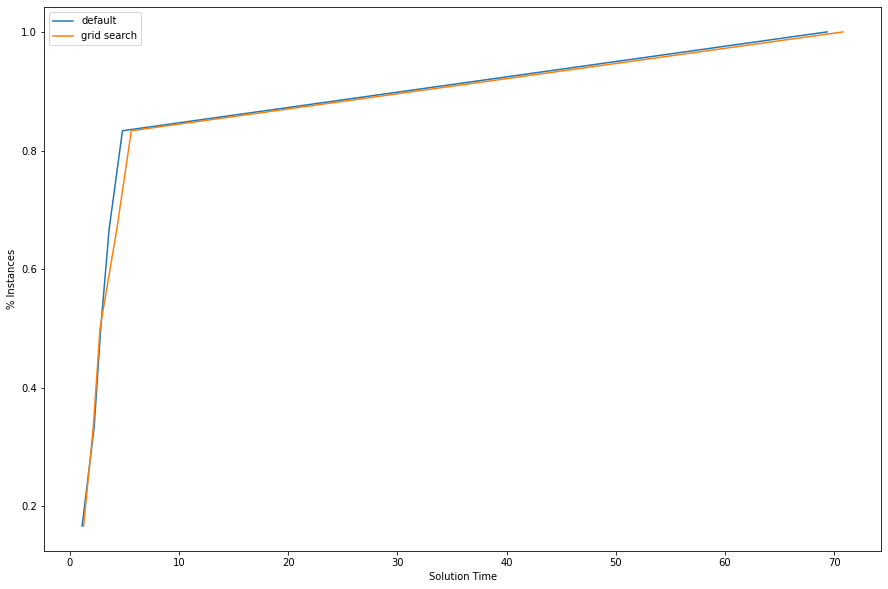

In [ ]:
stats_df = df_merge2.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_merge2.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})


stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])

stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()

plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

#Old code that does not average over 3 seeds

In [ ]:
rows = []
for yml in grid_search_yml_paths:
   name = str(yml).split("experiment_2_grid/")[1].split("__trans")[0]
   seed = str(yml).split("seed__")[1].split("__sample")[0]
   if "root" not in str(yml) and seed == "1":
      #print(str(yml))
      with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
                print(data)
      rows.append([name,data['gap'],data['solve_time'],data['status']])


df_grid_search = pd.DataFrame(rows,columns =['NAME','gap','SOLUTION TIME', 'status'])#


rows = []
for yml in default_yml_paths:
   name = str(yml).split("experiment_2_default/")[1].split("__trans")[0]
   seed = str(yml).split("seed__")[1].split("__sample")[0]
   if "root" not in str(yml) and seed == "1":
      #print(str(yml))
      with open(str(yml)) as f:
                data = yaml.load(f, Loader=SafeLoader)
                print(name)
                print(data\]=
      rows.append([name,data['gap'],data['solve_time'],data['status']])


df_default = pd.DataFrame(rows,columns =['NAME','gap','SOLUTION TIME', 'status'])

{'dir_cut_off': 0.0, 'dual_bound': 21477.0, 'efficacy': 0.0, 'gap': 0.0, 'int_support': 1.0, 'num_cuts': 0, 'num_cuts_applied': 10, 'num_lp_iterations': 7891, 'num_nodes': 1, 'obj_parallelism': 0.0, 'primal_bound': 21477.0, 'primal_dual_integral': 89.87, 'solution_fractionality': 0.0, 'solve_time': 1.365044, 'status': 'optimal'}
{'dir_cut_off': 0.1, 'dual_bound': 3249.502667894596, 'efficacy': 0.0, 'gap': 0.021657874206760106, 'int_support': 0.1, 'num_cuts': 0, 'num_cuts_applied': 31619, 'num_lp_iterations': 6751759, 'num_nodes': 107865, 'obj_parallelism': 0.8, 'primal_bound': 3319.8799879103885, 'primal_dual_integral': 2.89, 'solution_fractionality': 0.0, 'solve_time': 600.000619, 'status': 'timelimit'}
22433
{'dir_cut_off': 0.0, 'dual_bound': 21477.0, 'efficacy': 1.0, 'gap': 0.0, 'int_support': 0.1, 'num_cuts': 0, 'num_cuts_applied': 25, 'num_lp_iterations': 6171, 'num_nodes': 4, 'obj_parallelism': 0.1, 'primal_bound': 21477.0, 'primal_dual_integral': 121.24, 'solution_fractionality'

In [ ]:

df_merge2 = pd.merge(df_default, df_grid_search, on='NAME', how='inner', suffixes=('', '_grid'))

In [ ]:
df_hit_time_limit = df_merge2[df_merge2['status'] == 'timelimit']
df_optimal = df_merge2[df_merge2['status'] != 'timelimit']

In [ ]:
df_optimal['dif'] = 

In [ ]:
df_merge2.head()

,NAME,gap,SOLUTION TIME,status,gap_grid,SOLUTION TIME_grid,status_grid
0,22433,0.000000,1.214273,optimal,0.000000,1.365044,optimal
1,50v-10,0.020874,600.000822,timelimit,0.021658,600.000619,timelimit


In [ ]:
df_merge2 = df_optimal
import matplotlib.pyplot as plt

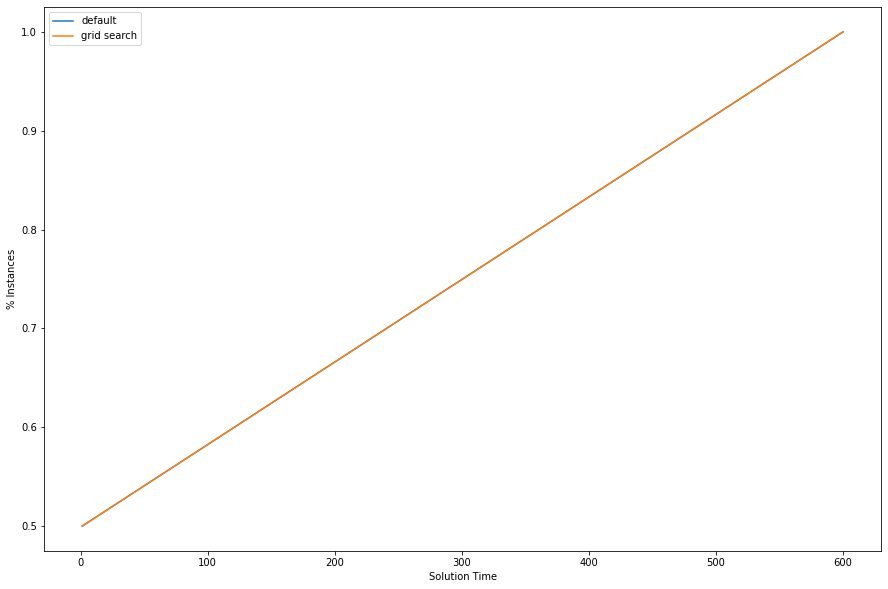

In [ ]:
stats_df = df_merge2.groupby('SOLUTION TIME')['SOLUTION TIME'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME': 'frequency_default'})
stats_df2 = df_merge2.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})


stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_grid'] = stats_df2['frequency_grid'] / sum(stats_df2['frequency_grid'])

stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
stats_df2['cdf_grid'] = stats_df2['pdf_grid'].cumsum()
stats_df2 = stats_df2.reset_index()

plt.figure(figsize= (15,10))
plt.plot(stats_df['SOLUTION TIME'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_grid'].to_list(), stats_df2['cdf_grid'].to_list(), label = "grid search")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

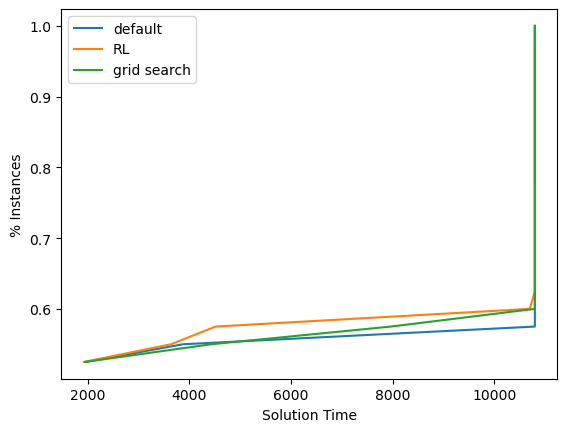

In [ ]:
stats_df = df_merged.groupby('SOLUTION TIME_default')['SOLUTION TIME_default'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_default': 'frequency_default'})
stats_df2 = df_merged.groupby('SOLUTION TIME_RL')['SOLUTION TIME_RL'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_RL': 'frequency_RL'})
stats_df3 = df_merged.groupby('SOLUTION TIME_grid')['SOLUTION TIME_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'SOLUTION TIME_grid': 'frequency_grid'})

# # PDF
stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
stats_df2['pdf_RL'] = stats_df2['frequency_RL'] / sum(stats_df2['frequency_RL'])
stats_df3['pdf_grid'] = stats_df3['frequency_grid'] / sum(stats_df3['frequency_grid'])
#
# # CDF
stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
stats_df = stats_df.reset_index()
# stats_df.plot(x = 'SOLUTION TIME_default', y = 'cdf_default', grid = True)
stats_df2['cdf_RL'] = stats_df2['pdf_RL'].cumsum()
stats_df2 = stats_df2.reset_index()
# stats_df2.plot(x = 'SOLUTION TIME_RL', y = 'cdf_RL', grid = True)
stats_df3['cdf_grid'] = stats_df3['pdf_grid'].cumsum()
stats_df3 = stats_df3.reset_index()
# stats_df3.plot(x = 'SOLUTION TIME_grid', y = 'cdf_grid', grid = True)

plt.plot(stats_df['SOLUTION TIME_default'].to_list()[20:], stats_df['cdf_default'][20:].to_list(), label = "default")
plt.plot(stats_df2['SOLUTION TIME_RL'][20:].to_list(), stats_df2['cdf_RL'][20:].to_list(), label = "RL")
plt.plot(stats_df3['SOLUTION TIME_grid'][20:].to_list(), stats_df3['cdf_grid'][20:].to_list(), label = "grid search")
plt.xlabel('Solution Time')
plt.ylabel('% Instances')
plt.legend()
plt.show()

In [ ]:
import numpy as np
df_grid = pd.read_csv("Grid_search_nov9th_done.csv")[['NAME', 'GAP']]
df_default = pd.read_csv('result_default.csv')[['NAME', 'GAP']]
df_RL = pd.read_csv("runs_default/results_table24.csv")[['NAME', 'GAP']]
# df_RL.loc[df_RL['NAME'].isin(df_default['NAME'].to_list())]
df_default = df_default.drop_duplicates(subset=['NAME'], keep='first')
df_merge2 = pd.merge(df_default, df_RL, on='NAME', how='inner', suffixes=('', '_RL'))
df_merged = pd.merge(df_merge2, df_grid, on='NAME', how='inner', suffixes=('_default', '_grid'))
df_merged[range] = pd.cut(df_merged['NAME'], bins=np.arange(0, 10800, 12))
# stats_df = df_merged.groupby('GAP_default')['GAP_default'].agg('count').pipe(pd.DataFrame).rename(columns = {'GAP_default': 'frequency_default'})
# stats_df2 = df_merged.groupby('GAP_RL')['GAP_RL'].agg('count').pipe(pd.DataFrame).rename(columns = {'GAP_RL': 'frequency_RL'})
# stats_df3 = df_merged.groupby('GAP_grid')['GAP_grid'].agg('count').pipe(pd.DataFrame).rename(columns = {'GAP_grid': 'frequency_grid'})

# # PDF
# stats_df['pdf_default'] = stats_df['frequency_default'] / sum(stats_df['frequency_default'])
# stats_df2['pdf_RL'] = stats_df2['frequency_RL'] / sum(stats_df2['frequency_RL'])
# stats_df3['pdf_grid'] = stats_df3['frequency_grid'] / sum(stats_df3['frequency_grid'])
# #
# # # CDF
# stats_df['cdf_default'] = stats_df['pdf_default'].cumsum()
# stats_df = stats_df.reset_index()
# # stats_df.plot(x = 'GAP_default', y = 'cdf_default', grid = True)
# stats_df2['cdf_RL'] = stats_df2['pdf_RL'].cumsum()
# stats_df2 = stats_df2.reset_index()
# # stats_df2.plot(x = 'GAP_RL', y = 'cdf_RL', grid = True)
# stats_df3['cdf_grid'] = stats_df3['pdf_grid'].cumsum()
# stats_df3 = stats_df3.reset_index()
# # stats_df3.plot(x = 'GAP_grid', y = 'cdf_grid', grid = True)
#
# plt.plot(stats_df['GAP_default'].to_list(), stats_df['cdf_default'].to_list(), label = "default")
# plt.plot(stats_df2['GAP_RL'].to_list(), stats_df2['cdf_RL'].to_list(), label = "RL")
# plt.plot(stats_df3['GAP_grid'].to_list(), stats_df3['cdf_grid'].to_list(), label = "grid search")
# plt.xlabel('GAP')
# plt.ylabel('# Instances')
# plt.legend()
# plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

Text(0.5, 0, 'SOLUTION TIME')

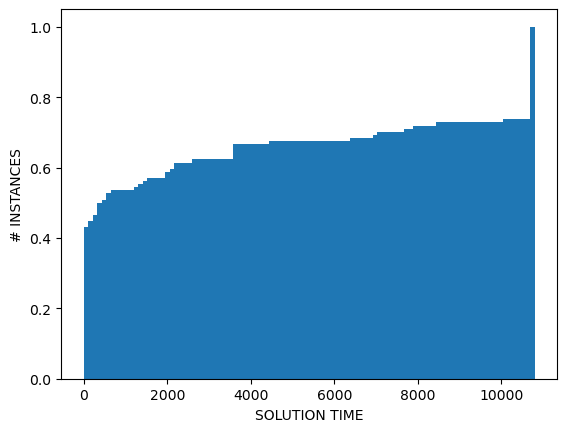

In [ ]:

ax = df_grid.plot.hist(cumulative=True, density=1, bins=100)
ax.set_ylabel("# INSTANCES")
ax.set_xlabel('SOLUTION TIME')